In [213]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [214]:
dataOK = pd.read_csv("OK_earthquake_catalog.csv")

dataOK['origintime'] = pd.to_datetime(dataOK['origintime'])
dataOK = dataOK[dataOK['magnitude'] != 'None']
dataOK['month'] = pd.to_datetime(dataOK['origintime']).dt.to_period('M')
dataOK['year'] = pd.to_datetime(dataOK['origintime']).dt.to_period('Y')
dataOK = dataOK.reset_index()


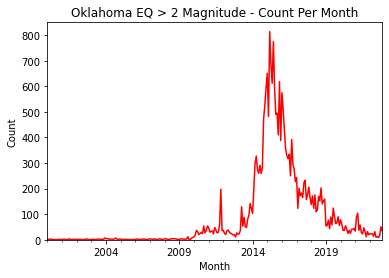

In [217]:
monthlyDataAll = dataOK['origintime'].groupby([dataOK['month']]).agg('count')

dataOK['magnitude'] = dataOK['magnitude'].astype(float)
bigsOK = dataOK[dataOK['magnitude']>2]
ax = bigsOK['origintime'].groupby([bigsOK['month']]).agg('count').plot(color='red',title="Oklahoma EQ > 2 Magnitude - Count Per Month")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.set_ylim(0,850)
fig = ax.get_figure()
fig.savefig('Images/OKmonthlyEQ.jpg',dpi=1200)


C:\Users\danco\AppData\Local\Temp/ipykernel_484/896109181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigsOK3['M3.0+'] = bigsOK3['origintime']
C:\Users\danco\AppData\Local\Temp/ipykernel_484/896109181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigsOK['M2.0+'] = bigsOK['origintime']


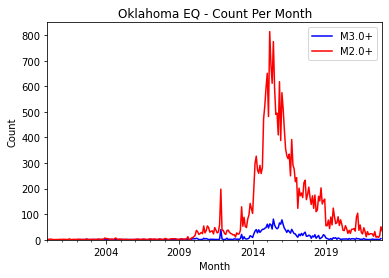

In [218]:
monthlyDataAll = dataOK['origintime'].groupby([dataOK['month']]).agg('count')

dataOK['magnitude'] = dataOK['magnitude'].astype(float)
bigsOK3 = dataOK[dataOK['magnitude']>3]
bigsOK3['M3.0+'] = bigsOK3['origintime']
ax = bigsOK3['M3.0+'].groupby([bigsOK3['month']]).agg('count').plot(color='blue')


bigsOK = dataOK[dataOK['magnitude']>2]
bigsOK['M2.0+'] = bigsOK['origintime']
ax = bigsOK['M2.0+'].groupby([bigsOK['month']]).agg('count').plot(color='red',title="Oklahoma EQ - Count Per Month")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.set_ylim(0,850)
ax.legend()
fig = ax.get_figure()
fig.savefig('Images/OKmonthlyEQ23.jpg',dpi=1200)



In [219]:
dataCA = pd.read_csv("CA_earthquake_catalog.csv")

dataCA['origintime'] = pd.to_datetime(dataCA['origintime'])
dataCA['month'] = pd.to_datetime(dataCA['origintime']).dt.to_period('M')
dataCA = dataCA.reset_index()
# dataOK.head(20)

C:\Users\danco\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [220]:
outline_CA = gpd.read_file("./Shapefiles/CA_State_TIGER2016.shp")
outline_CA =outline_CA.to_crs("EPSG:4326")

In [221]:
gdf_CA_quakes = gpd.GeoDataFrame(
    dataCA, geometry=gpd.points_from_xy(dataCA.longitude, dataCA.latitude))

In [223]:
gdf_CA_quakes = gdf_CA_quakes.set_crs("EPSG:4326")
gdf_CA_quakes = gdf_CA_quakes.to_crs("EPSG:4326")

<AxesSubplot:>

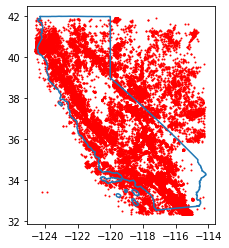

In [224]:
base = outline_CA.boundary.plot()
gdf_CA_quakes.plot(ax=base, marker='o', color='red', markersize=1)
# base = outline_CA.plot()

<AxesSubplot:>

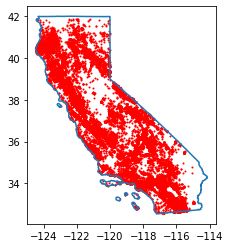

In [226]:
# Filter to quakes in state outline
CA_quakes_mask = gdf_CA_quakes.within(outline_CA.loc[0,'geometry'])
gdf_CA_quakes_filter = gdf_CA_quakes.loc[CA_quakes_mask]
base = outline_CA.boundary.plot()
gdf_CA_quakes_filter.plot(ax=base, marker='o', color='red', markersize=1)

C:\Users\danco\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


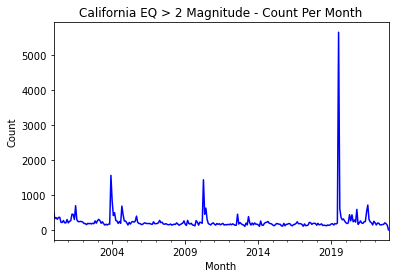

In [227]:
monthlyDataAllCA_filtered = gdf_CA_quakes_filter['origintime'].groupby([gdf_CA_quakes_filter['month']]).agg('count')
# monthlyDataAll.plot()
gdf_CA_quakes_filter['magnitude'] = gdf_CA_quakes_filter['magnitude'].astype(float)
gdf_CA_quakes_big = gdf_CA_quakes_filter[gdf_CA_quakes_filter['magnitude']>2]
ax = gdf_CA_quakes_big['origintime'].groupby([gdf_CA_quakes_big['month']]).agg('count').plot(color='blue',title="California EQ > 2 Magnitude - Count Per Month")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
fig = ax.get_figure()
fig.savefig('Images/CAmonthlyEQ.jpg',dpi=1200)

# bigsOK['origintime'].groupby([bigsOK['month']]).agg('count').plot()

C:\Users\danco\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\danco\AppData\Local\Temp/ipykernel_484/98976854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigsOK['Oklahoma-Normalized'] = bigsOK['origintime']


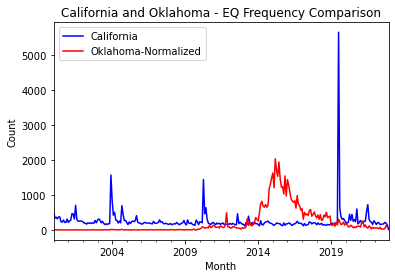

In [228]:
gdf_CA_quakes_big['California'] = gdf_CA_quakes_big['origintime']
ax = gdf_CA_quakes_big['California'].groupby([gdf_CA_quakes_big['month']]).agg('count').plot(color='blue')

bigsOK['Oklahoma-Normalized'] = bigsOK['origintime']
ok_monthly_count = bigsOK['Oklahoma-Normalized'].groupby([bigsOK['month']]).agg('count')
ok_monthly_count_norm = bigsOK['Oklahoma-Normalized'].groupby([bigsOK['month']]).agg('count')*2.5
ok_monthly_count_norm.plot(color='red',title="California and Oklahoma - EQ Frequency Comparison")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.legend()
fig = ax.get_figure()
fig.savefig('Images/CA-OK_Comparison_norm.jpg',dpi=1200)

# bigsOK['origintime'].groupby([bigsOK['month']]).agg('count').plot()

In [229]:
ca_monthly_count = gdf_CA_quakes_big['California'].groupby([gdf_CA_quakes_big['month']]).agg('count')
print(ca_monthly_count.mean())
print(ca_monthly_count.std())

256.67391304347825
359.0361878553795
